<a href="https://colab.research.google.com/github/Nick-FF/AnalisDataAlgorithm/blob/Less2/%D0%94%D0%97_2_%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA%2C_%D0%BC%D0%B0%D1%81%D1%88%D1%82%D0%B0%D0%B1%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнее задание <a class="anchor" id="hw"></a><center>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [25]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [26]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [27]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [28]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


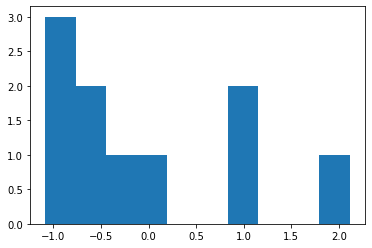

In [29]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [30]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод**

In [31]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])#первоначально случайным образом задаем веса для признаков
    print(W)
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W) # расчет предсказания
        err = calc_mse(y, y_pred) # проверка предсказанного результата по среднеквадратичной ошибке
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [32]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

[-0.32387466  1.9795625  -1.10473983 -0.17986503]


array([56.21890547,  6.23067789, -0.16463982,  6.42093469])

In [33]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


0it [00:00, ?it/s]

[-0.21593641  0.96706186 -1.56582986 -0.02275534]


1it [00:00,  5.87it/s]

[ 0.45860076  0.18906834 -0.02873648  1.91603345]


2it [00:00,  5.35it/s]

[-0.17773563 -0.26020868  0.57094758 -1.30237909]


3it [00:00,  5.37it/s]

[ 2.03641867 -0.54987434 -1.12419887  0.11120057]


4it [00:00,  5.06it/s]

[ 0.42780367 -0.82752288 -0.06535161  1.46822079]


6it [00:01,  5.13it/s]

[ 0.00575356 -0.85091205 -1.0928316   0.99961777]
[-1.86861727 -0.23517694 -0.72108009  0.47441648]


8it [00:01,  5.48it/s]

[ 1.48008473 -1.28461954 -0.12121618  0.97344132]
[-0.24259412  1.85310589  0.38047921 -0.55994178]


10it [00:01,  5.34it/s]


[-2.46594977  0.53876729 -0.08431916 -0.69334308]


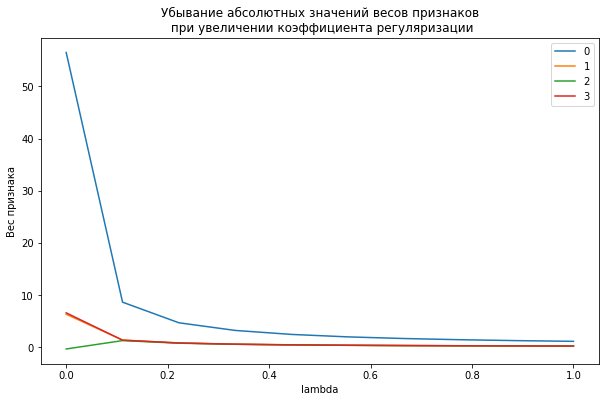

In [34]:
n = 10

coeffs = np.zeros((n, X_st.shape[1]))
print(coeffs)
lambda_list = np.linspace(0, 1, n)# список коэффициентов регуляризации, на его основе переберем расчеты градиентного спуска со всеми значениями из этого списка
# print(lambda_list)
for i, val in tqdm(enumerate(lambda_list)):# tqdm - хитрый дикоратор
    weights = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[i, :] = weights # полученные веса сохраним в массив, на основе этого массива построим график зависимости весов от коэффициента реуляризации


plt.figure(figsize=(10, 6))
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i], label=f'{i}')
    plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации')
   
        # print(X_st.shape[1],coeffs[:, i])
    
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Вес признака');

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [35]:
np.sign(0)

0

In [36]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [37]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 2.29182451  1.58092464 -0.46522408 -0.02905501], error 3210.1951543242526
Iter: 500, weights: [56.49277637  6.00958429  0.96689116  5.49202095], error 25.212533475918974
Iter: 1000, weights: [56.49499991  6.20122755  0.11764198  6.17799774], error 24.94463549865879
Iter: 1500, weights: [56.495       6.25390597 -0.1534904   6.40903923], error 24.91182389551101
Iter: 2000, weights: [56.495       6.27219964 -0.24517243  6.48537734], error 24.90678440801884
Iter: 2500, weights: [56.495       6.27901457 -0.27824495  6.51270917], error 24.9056998462973
Iter: 3000, weights: [56.495       6.28147933 -0.29015282  6.52253959], error 24.90540407313568
Iter: 3500, weights: [56.495       6.28236711 -0.29443915  6.52607759], error 24.90530987530734
Iter: 4000, weights: [56.495       6.28268668 -0.29598198  6.52735104], error 24.90527755871643
Iter: 4500, weights: [56.495       6.28280171 -0.29653731  6.52780941], error 24.90526613253228
Final MSE: 24.90526204645054


array([56.495     ,  6.28284307, -0.29673697,  6.5279742 ])

**3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Нет смысла применять одновременно и стандртизицию и нормализацию. Будет иметь значение последний примененный метод

In [38]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [39]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [40]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [41]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [42]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [43]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

**4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [44]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [45]:
X = standard_scale(X)

In [46]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [47]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [48]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 28855.410140535387
Iter: 500, error 3856.6554610586836
Iter: 1000, error 534.6554609178123
Iter: 1500, error 92.89322701443271
Iter: 2000, error 34.10550898287463
Iter: 2500, error 26.276715358862592
Iter: 3000, error 25.23340316555548
Iter: 3500, error 25.094265186830956
Iter: 4000, error 25.075696138927526
Iter: 4500, error 25.073216168570244
Final MSE: 25.072884719800985
CPU times: user 1min 19s, sys: 26.8 s, total: 1min 46s
Wall time: 54.8 s


In [49]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 28047.654715660272
Iter: 500, error 3575.7749210018264
Iter: 1000, error 462.8744187332857
Iter: 1500, error 94.83137140069472
Iter: 2000, error 34.02760784678912
Iter: 2500, error 26.55589848739196
Iter: 3000, error 25.843094776891867
Iter: 3500, error 25.77097452750736
Iter: 4000, error 25.533731349132314
Iter: 4500, error 25.659224466586277
Final MSE: 25.573026796802655
CPU times: user 17.6 s, sys: 4.76 s, total: 22.4 s
Wall time: 11.5 s


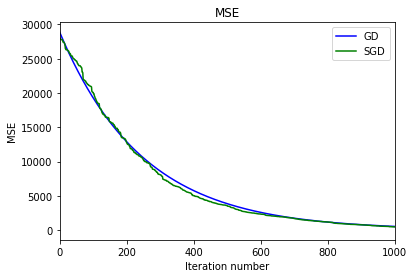

In [50]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [51]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

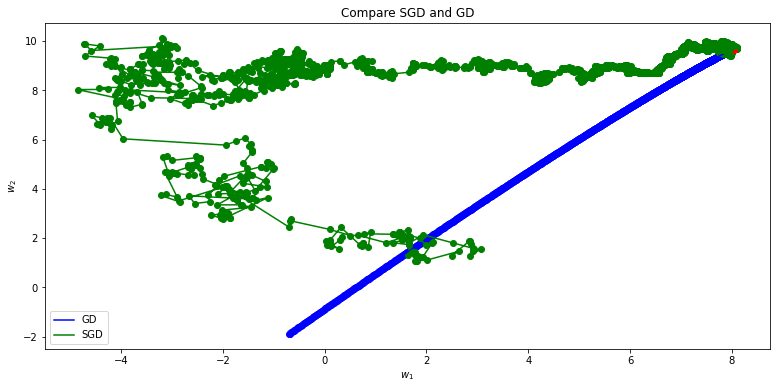

In [54]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()